In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read image

(612, 612)


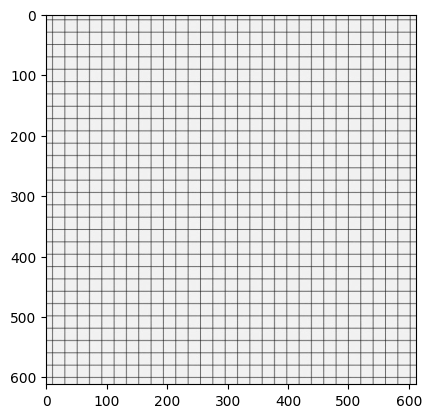

In [6]:
image = cv2.imread("../images/line.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(image, cmap="gray")

# 自己实现

In [7]:
# scharr与sobel算子思想一样，只是卷积核的系数不同，scharr算子提取边界也更加灵敏，能提取到更细小的边界，但请注意，越是灵敏就越是可能误判
K_x = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
])
K_y = K_x.T

In [8]:
def corr2d(X: np.ndarray, K: np.ndarray, padding_same=False) -> np.ndarray:
    """二维互相关运算

    Args:
        X (np.ndarray): 原图 [H, W]
        K (np.ndarray): 卷积核 [K_H, K_W]
        padding_same (bool, optional): 是否padding为原图大小. Defaults to False.

    Returns:
        np.ndarray: 互相关结果 [H, W]
    """
    X_ = X.copy()
    h, w = K.shape
    if padding_same:
        pad_width = [(h//2, h//2), (w//2, w//2)]
        X_ = np.pad(X_, pad_width=pad_width, mode="constant", constant_values=0)
    Y = np.zeros((X_.shape[0] - h + 1, X_.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X_[i:i + h, j:j + w] * K).sum()
    return Y

In [9]:
def prewitt(X: np.ndarray, K: np.ndarray):
    conv_result = corr2d(X.astype(np.float32), K.astype(np.float32), padding_same=True)
    clip_result = np.clip(conv_result, 0, 255)
    return clip_result.astype(np.uint8)

# x(去除x方向直线)

[[  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 ...
 [  0   2   3 ...   0   0 255]
 [  0   1   2 ...   0   0 255]
 [  0   0   1 ...   1   1 255]]


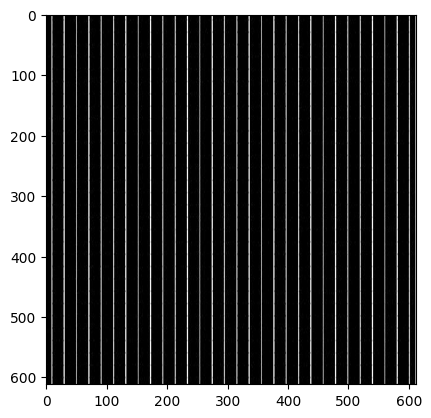

In [10]:
Gx_2 = prewitt(image, K_x)
print(Gx_2)
plt.imshow(Gx_2, cmap="gray")

# y(去除y方向直线)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   3   3   2]
 [  0   0   0 ...   2   4   4]
 [255 255 255 ... 255 255 255]]


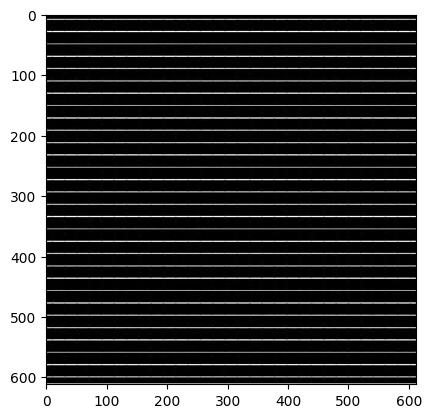

In [11]:
Gy_2 = prewitt(image, K_y)
print(Gy_2)
plt.imshow(Gy_2, cmap="gray")